In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#忽略警告
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 



In [2]:
# 读取训练集和测试集
df_train=pd.read_csv(r'D:\大学\数据思维与价值\大作业\train.csv')  

# 输出训练集和测试集大小
print(f'训练集大小{df_train.shape}')

# 输出训练集信息
print(df_train.info())

#查看训练集是否有空缺值
print(df_train.isnull().sum())


训练集大小(2000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64

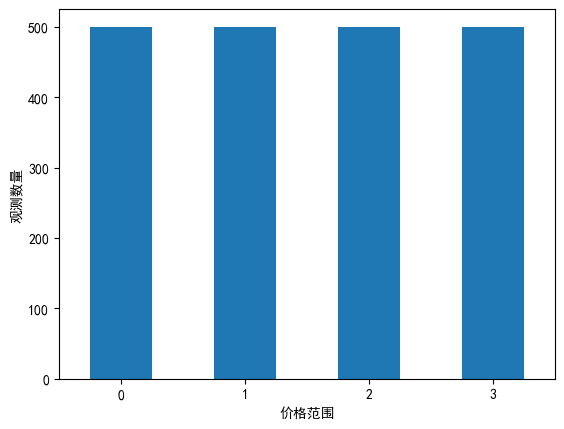

In [111]:
#画图——价格分布范围图
df_train['price_range'].sort_values().value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('价格范围')
plt.ylabel('观测数量')
plt.show()

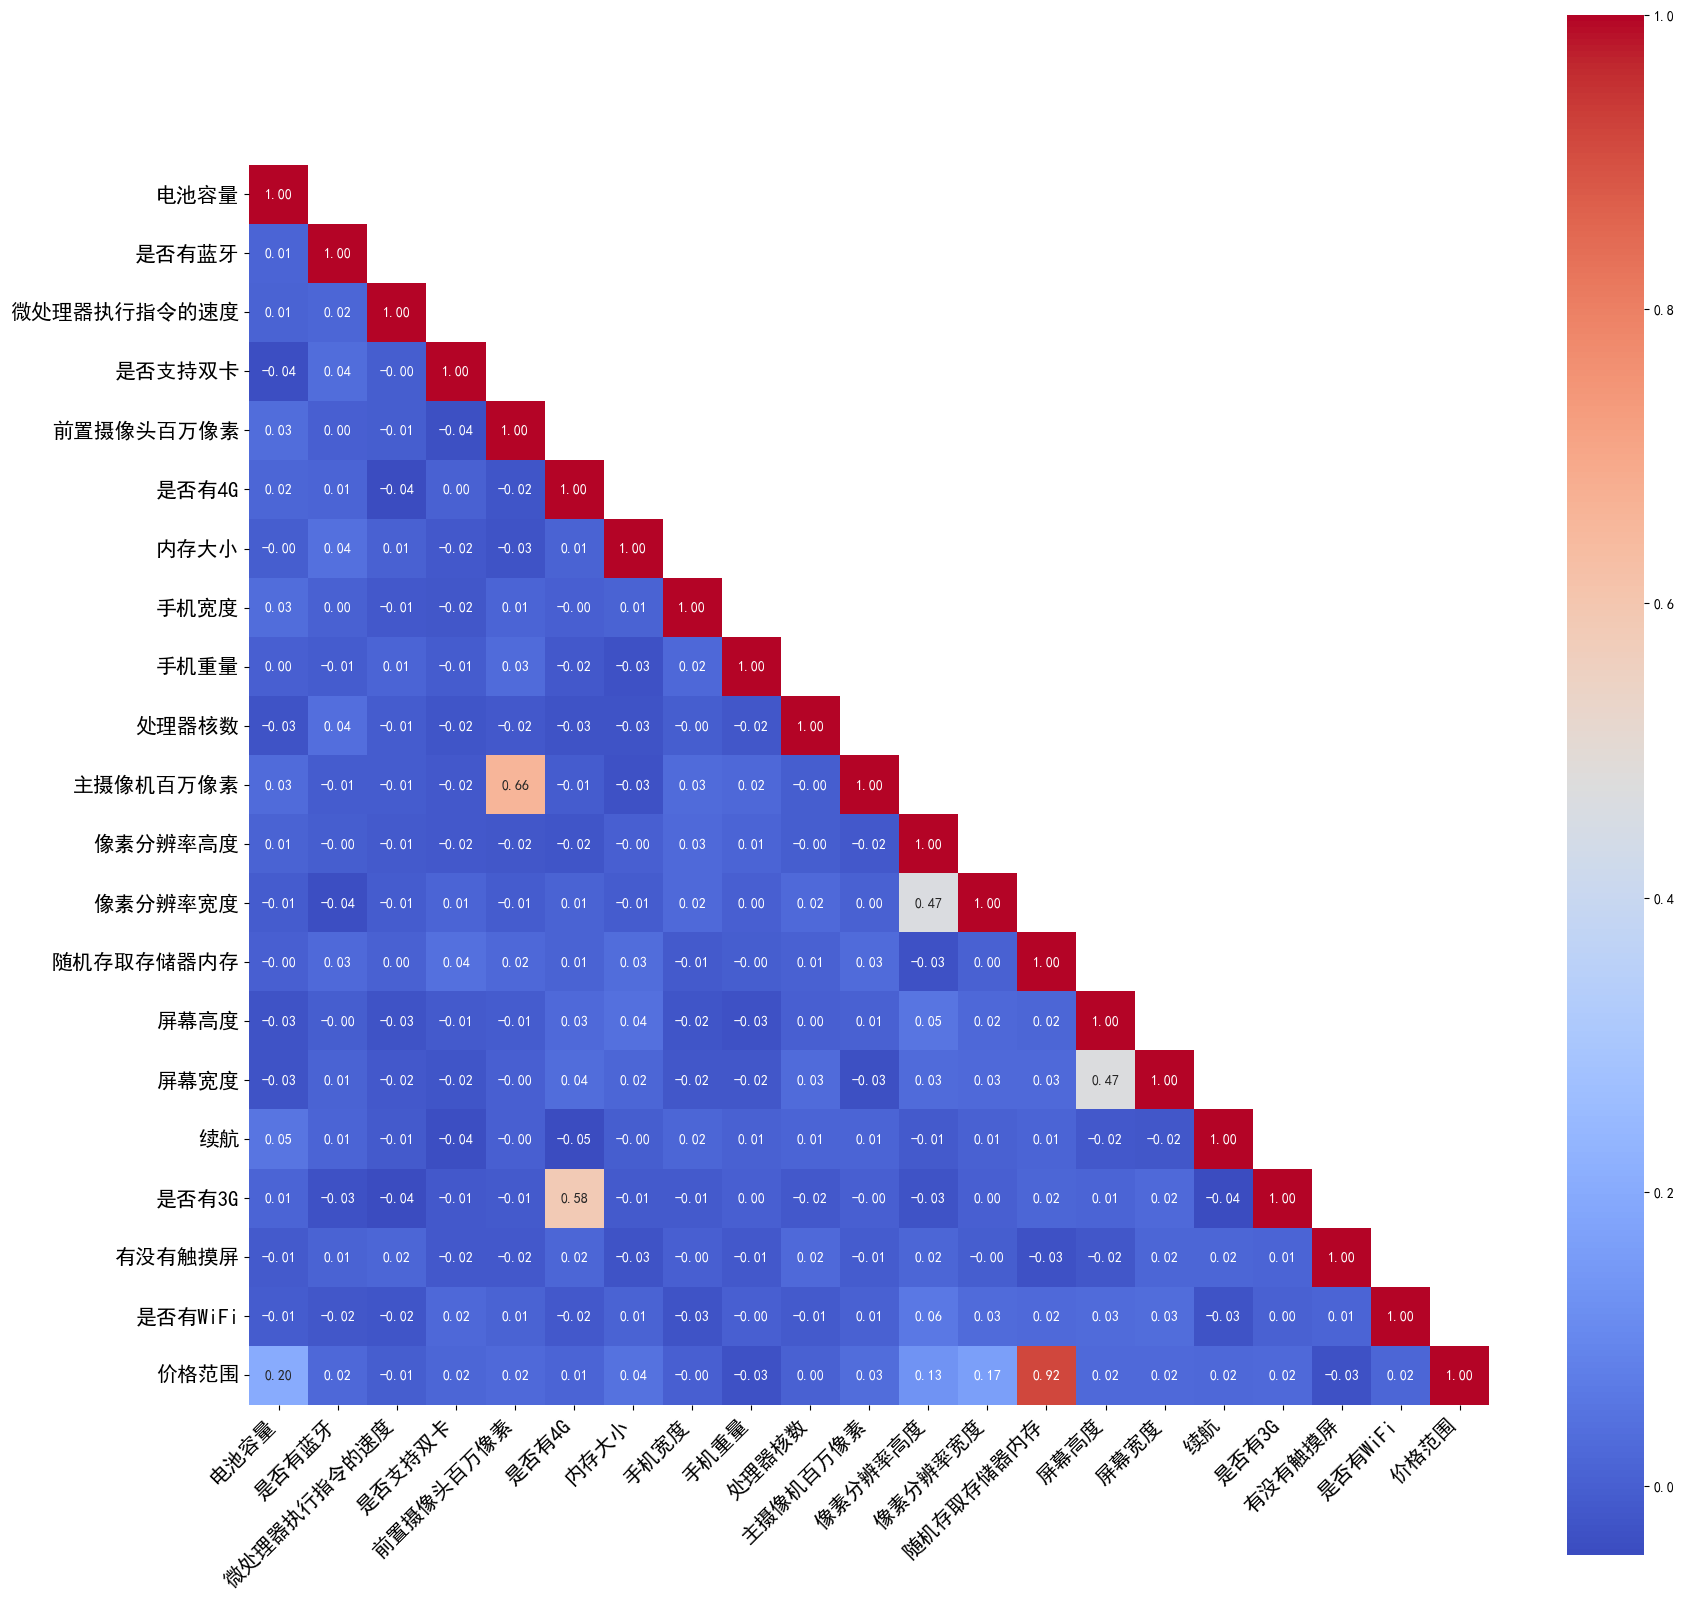

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

corr = df_train.corr(method='spearman')
mask = np.ones_like(corr)
mask = np.triu(mask, k=1)
plt.figure(figsize=(20, 20))
ax = sns.heatmap(corr, square=True, fmt='.2f', annot=True, cmap='coolwarm', mask=mask)
xticklabels = ['电池容量', '是否有蓝牙', '微处理器执行指令的速度', '是否支持双卡', '前置摄像头百万像素',
               '是否有4G', '内存大小', '手机宽度', '手机重量', '处理器核数', '主摄像机百万像素',
               '像素分辨率高度', '像素分辨率宽度', '随机存取存储器内存', '屏幕高度', '屏幕宽度',
               '续航', '是否有3G', '有没有触摸屏', '是否有WiFi', '价格范围']
yticklabels = xticklabels.copy()

ax.set_xticklabels(xticklabels, rotation=45, ha='right', fontproperties='SimHei',size=15)
ax.set_yticklabels(yticklabels, rotation=0, fontproperties='SimHei',size=15)
plt.show()


In [28]:
def numerical_univariate_analysis(columns):
    for i in columns:
        fig,ax = plt.subplots(1,2,figsize = (20,5))
        sns.kdeplot(data = df_train, x = i[0],fill = True,ax = ax[0])
        sns.kdeplot(data = df_train, x = i[0],fill = True,hue = 'price_range', ax = ax[1])
        plt.suptitle(i[1],size=20)
        ax[0].set_xlabel('')
        ax[0].set_ylabel('密度',size=15)
        ax[1].set_xlabel('')  
        ax[1].set_ylabel('密度',size=15)

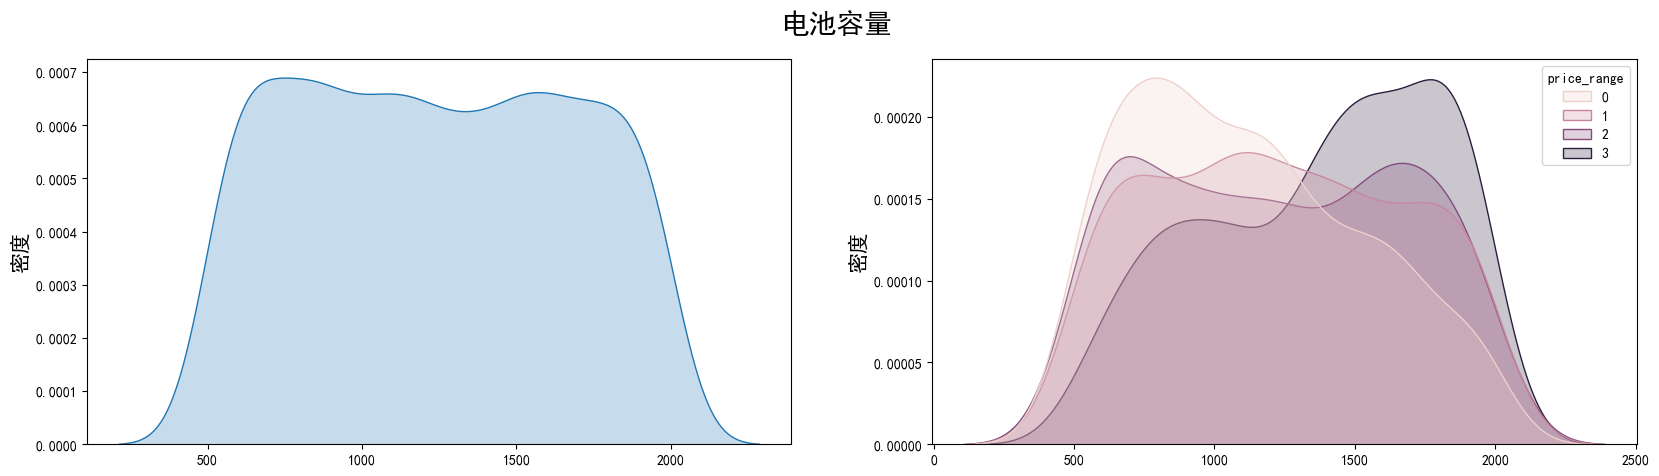

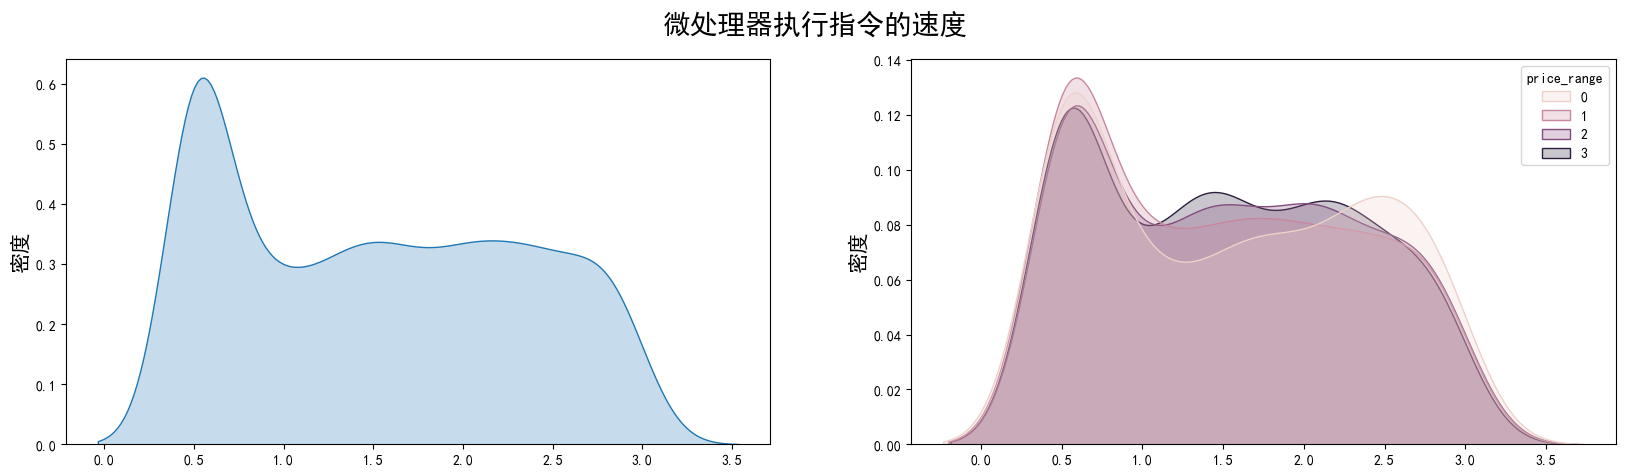

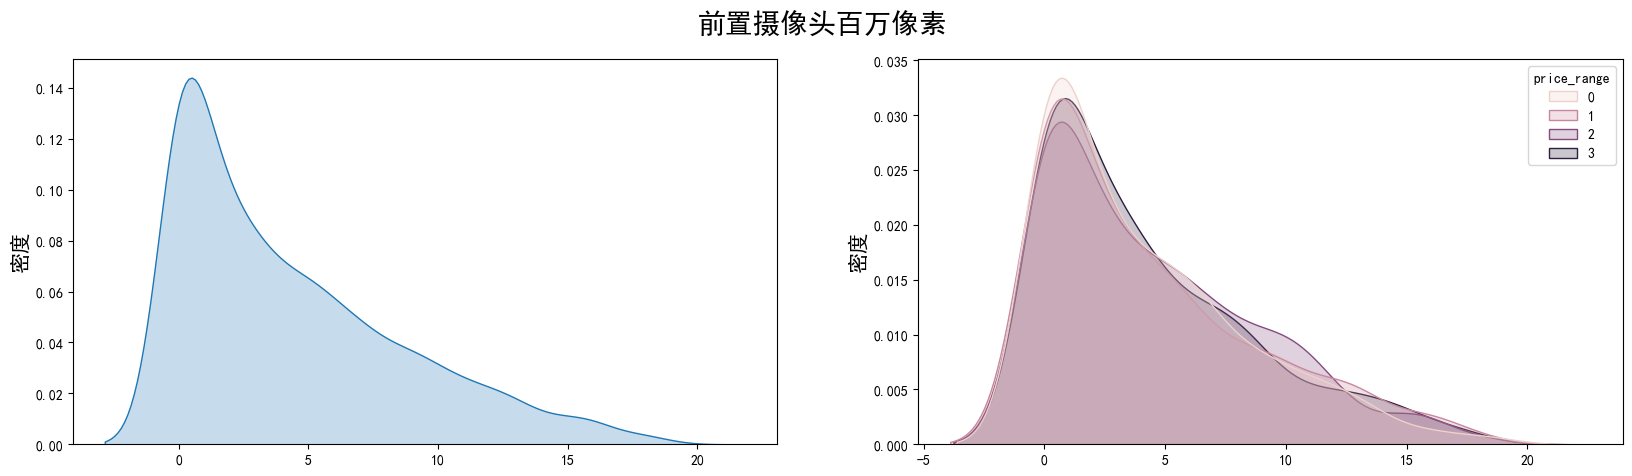

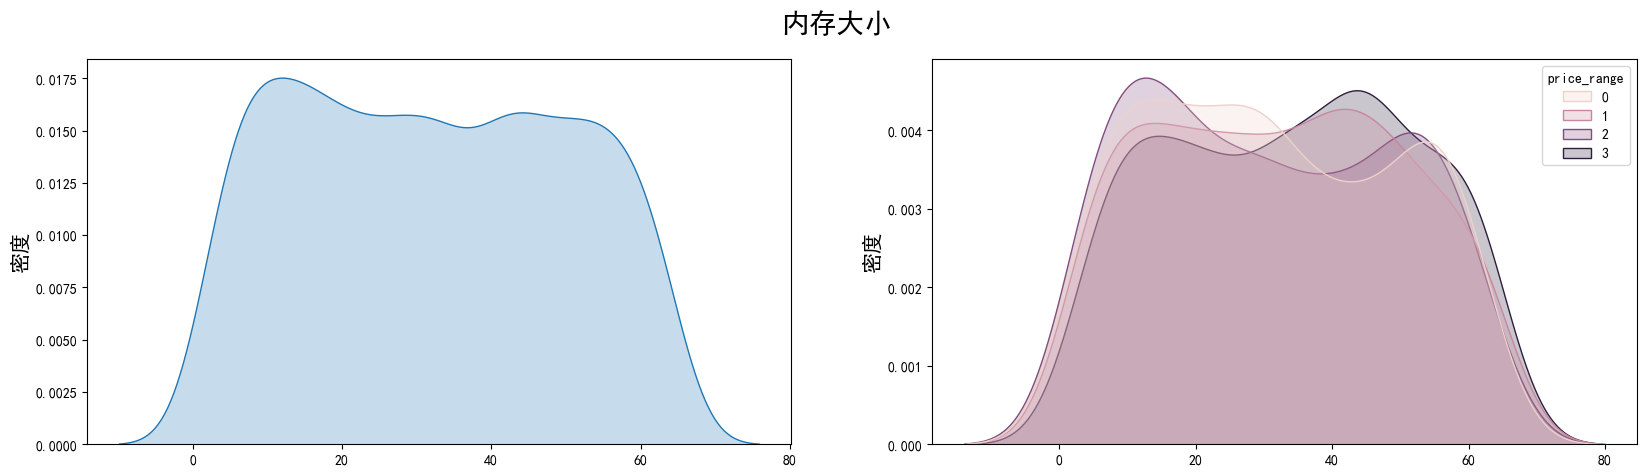

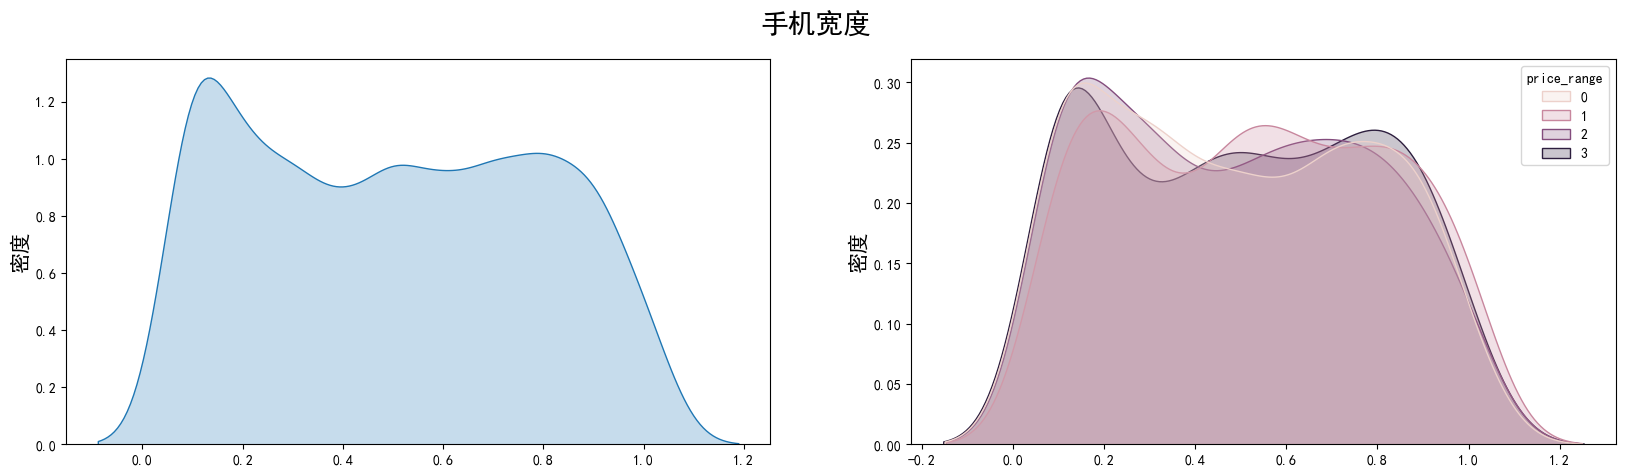

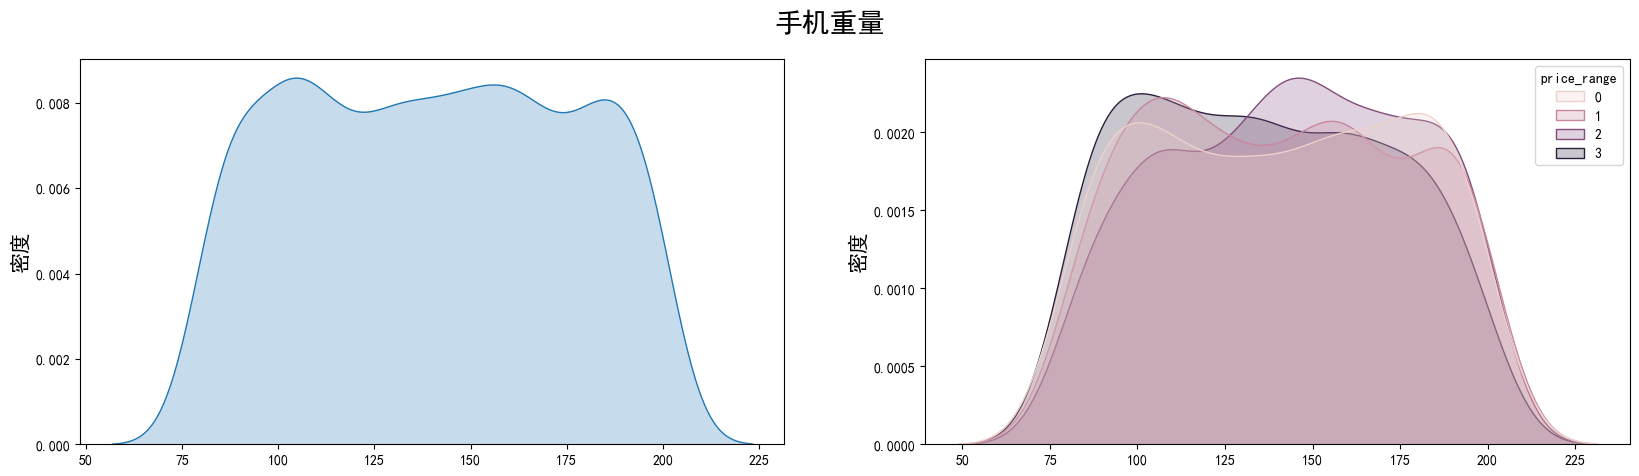

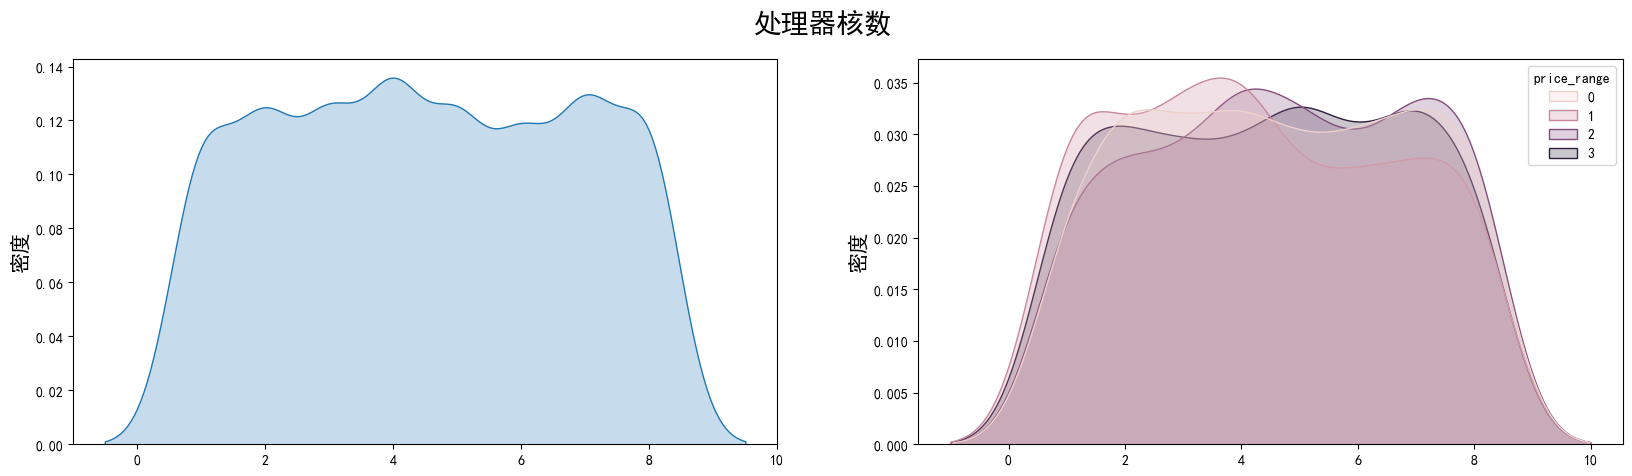

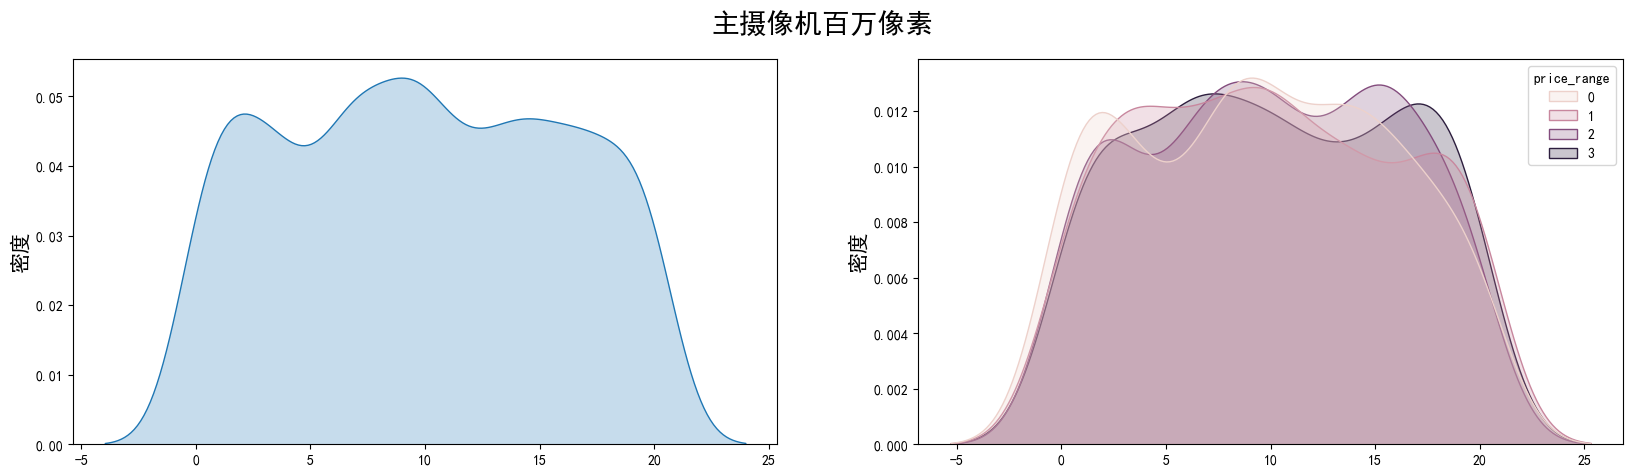

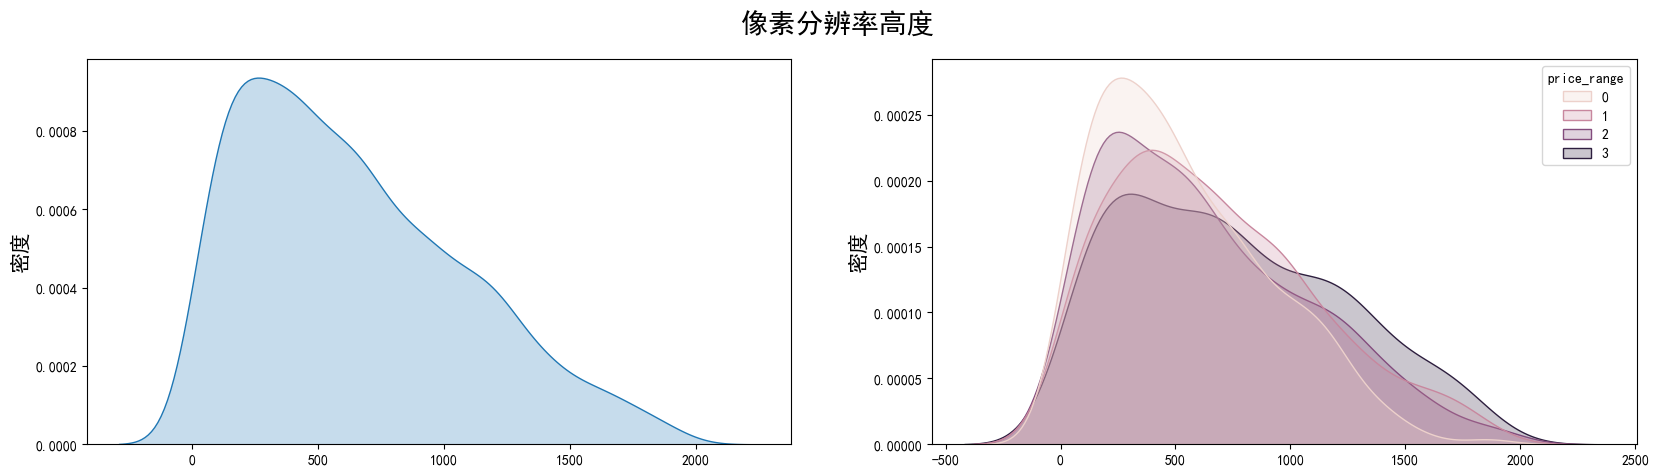

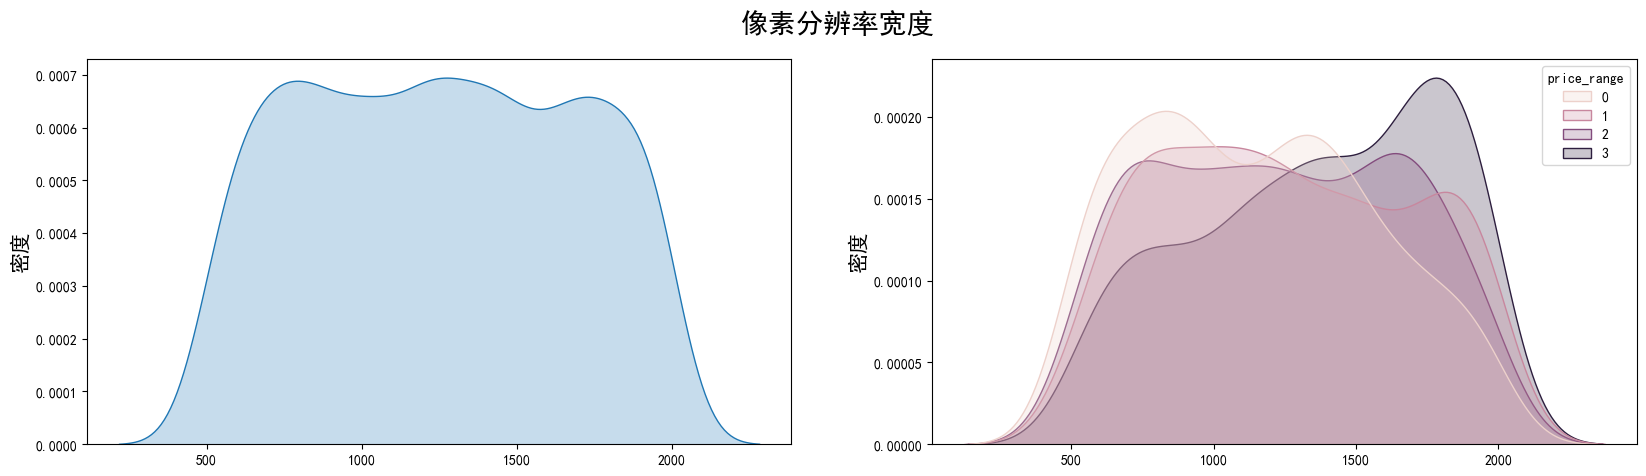

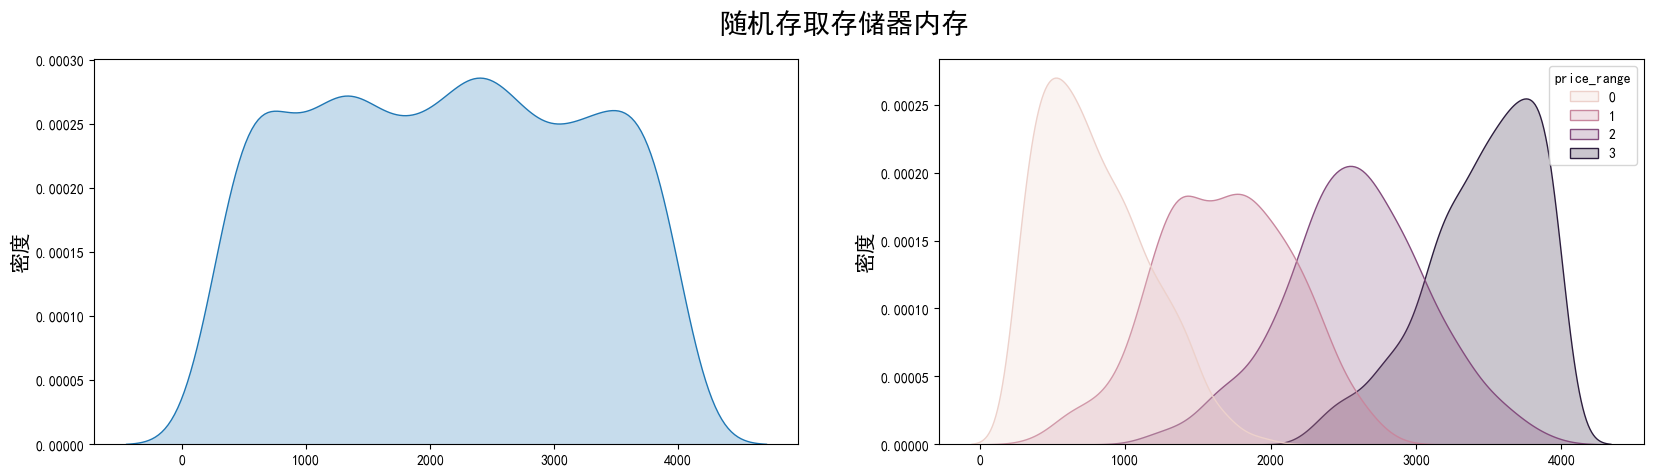

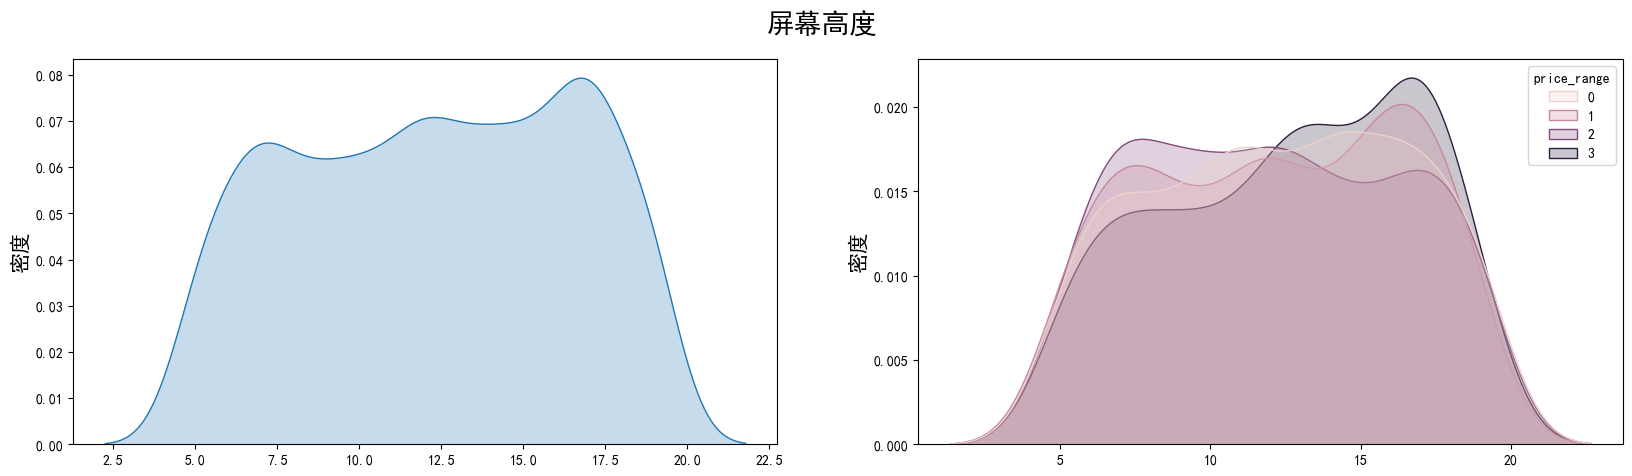

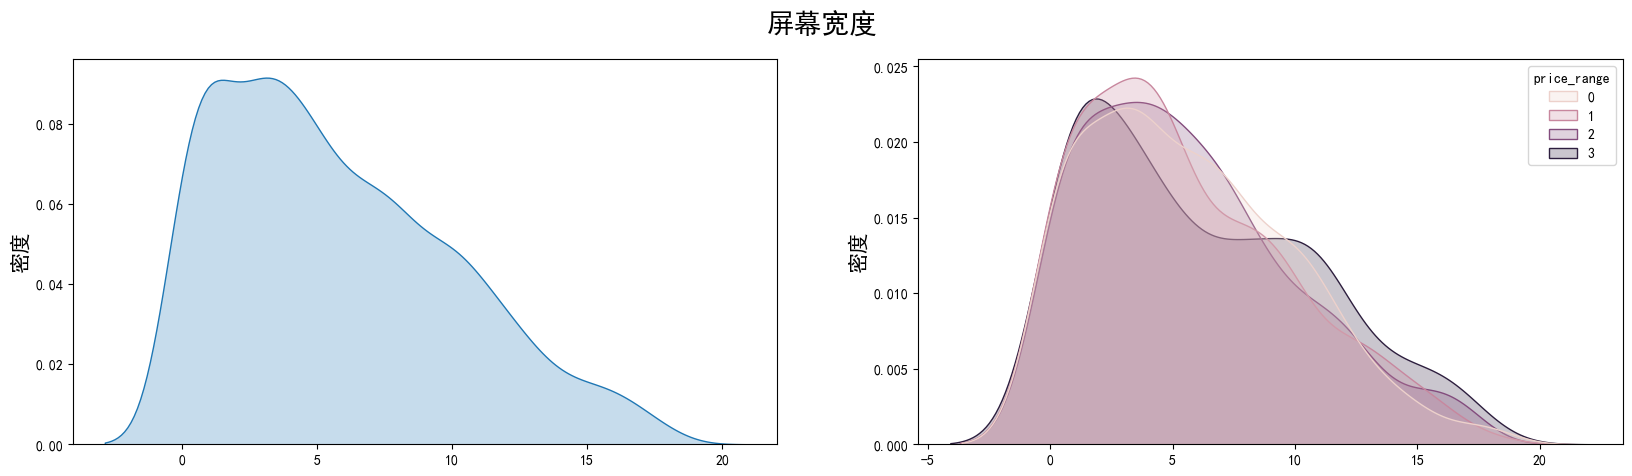

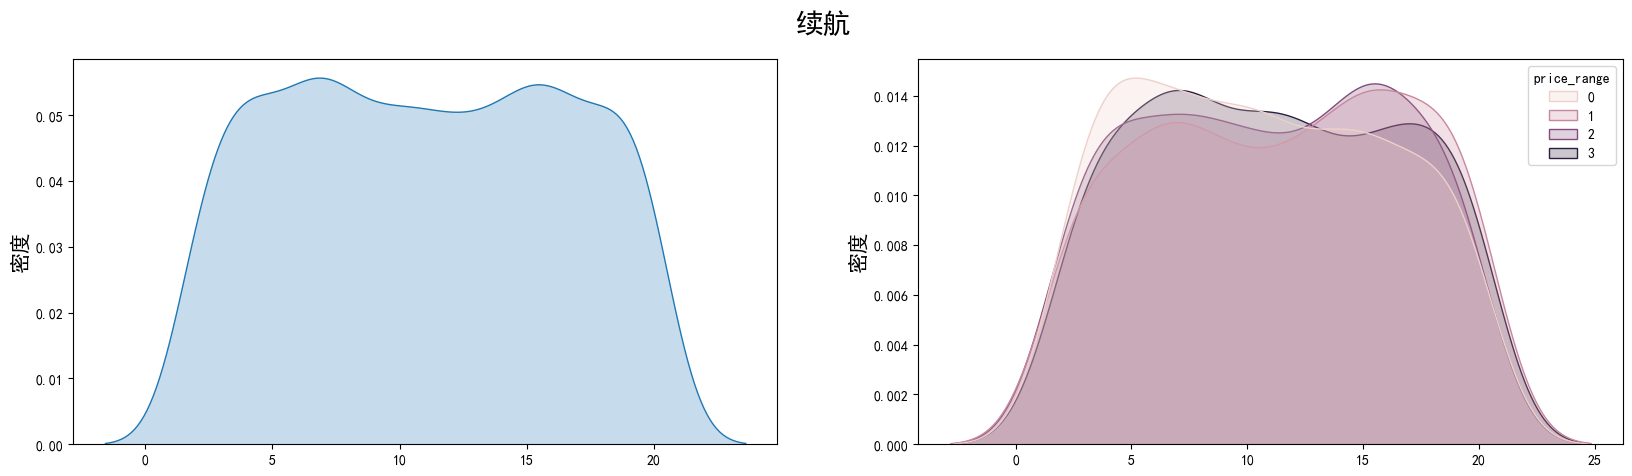

In [29]:
numerical_columns = np.array([
    ['battery_power', '电池容量'],
    ['clock_speed', '微处理器执行指令的速度'],
    ['fc', '前置摄像头百万像素'],
    ['int_memory', '内存大小'],
    ['m_dep', '手机宽度'],
    ['mobile_wt', '手机重量'],
    ['n_cores', '处理器核数'],
    ['pc', '主摄像机百万像素'],
    ['px_height', '像素分辨率高度'],
    ['px_width', '像素分辨率宽度'],
    ['ram', '随机存取存储器内存'],
    ['sc_h', '屏幕高度'],
    ['sc_w', '屏幕宽度'],
    ['talk_time', '续航'],
])
numerical_univariate_analysis(numerical_columns)

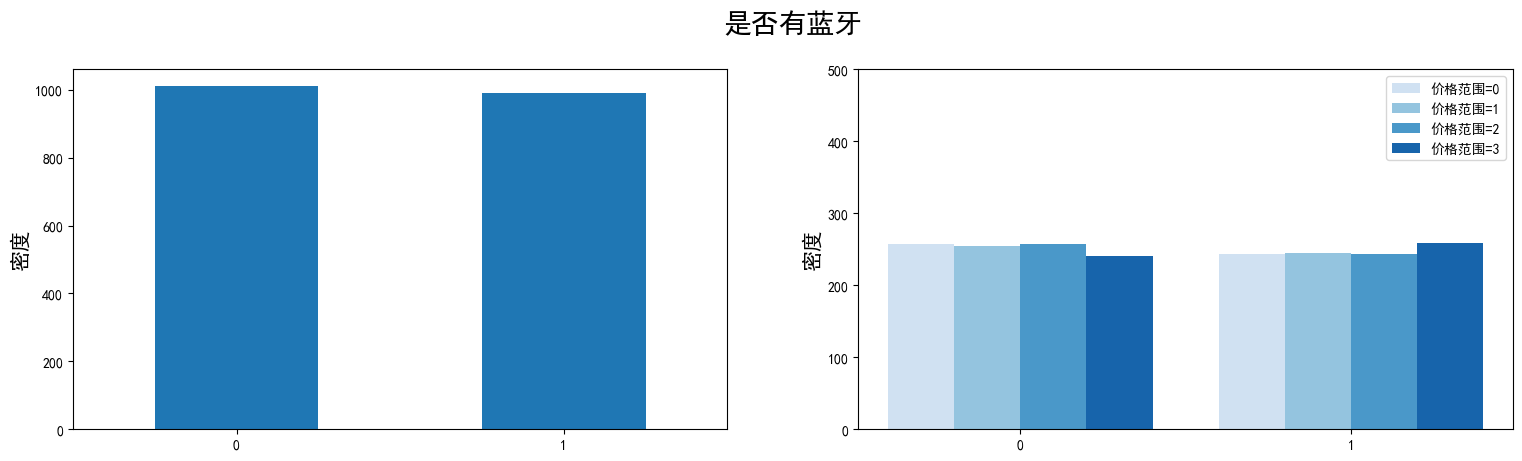

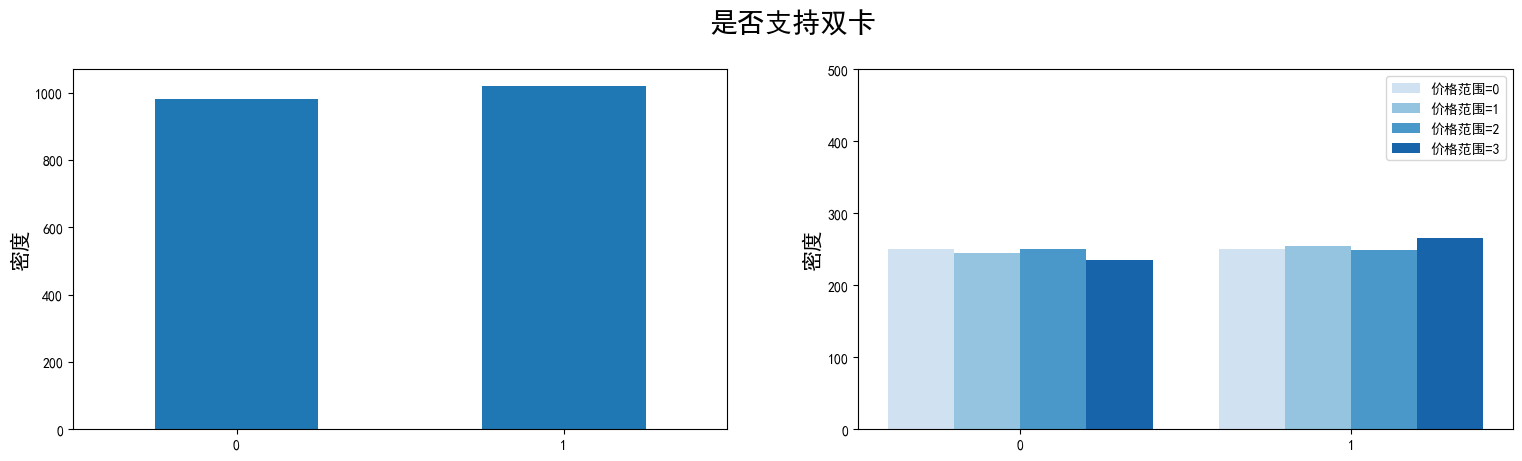

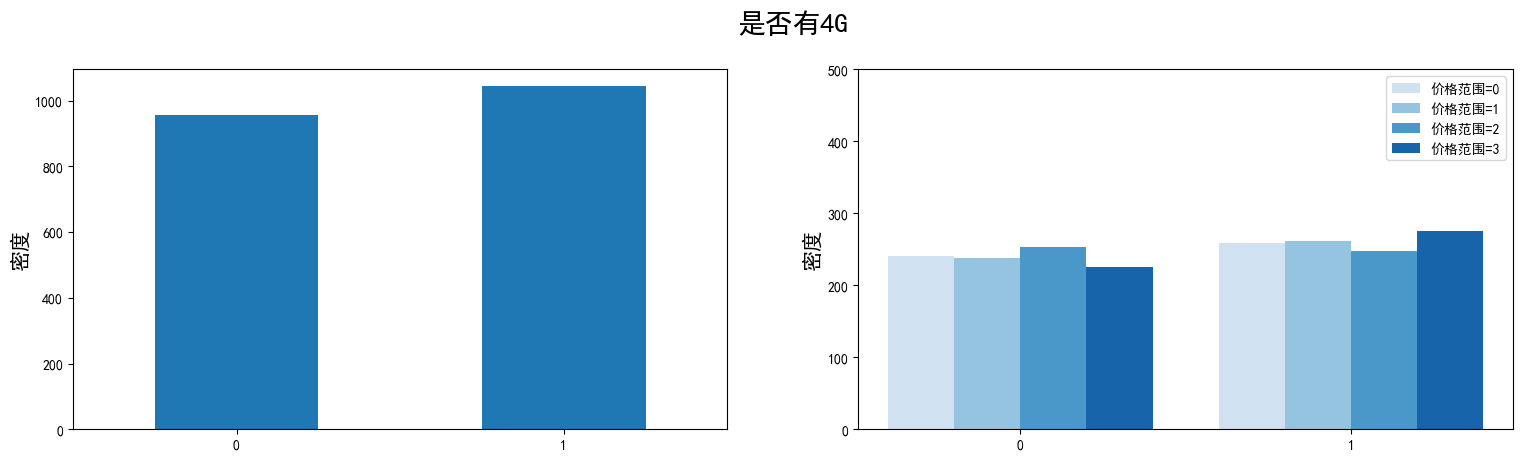

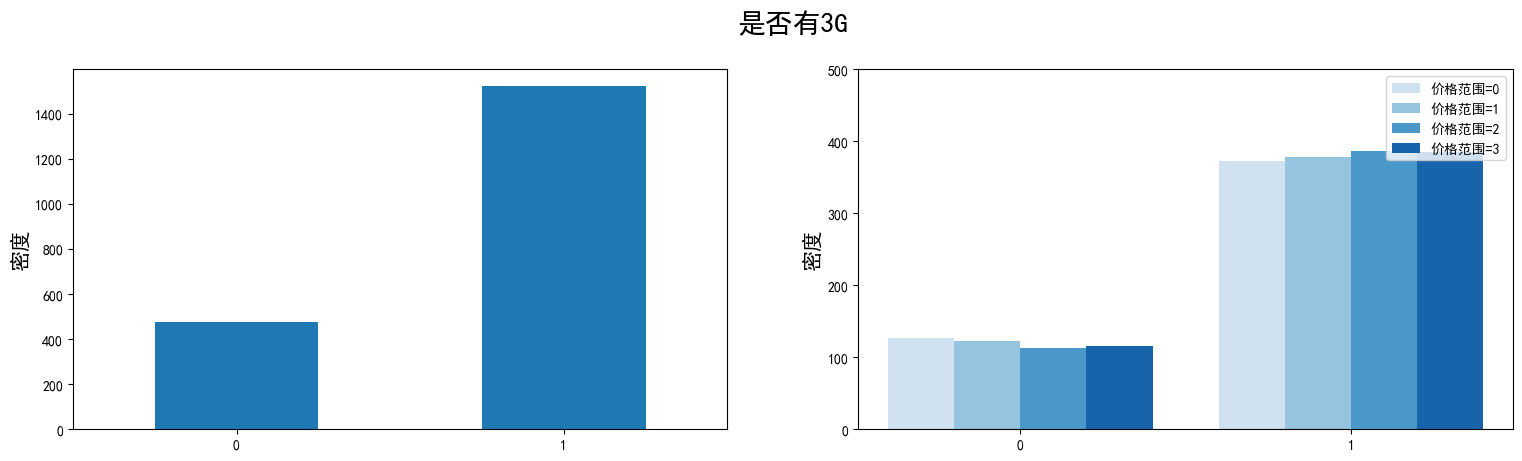

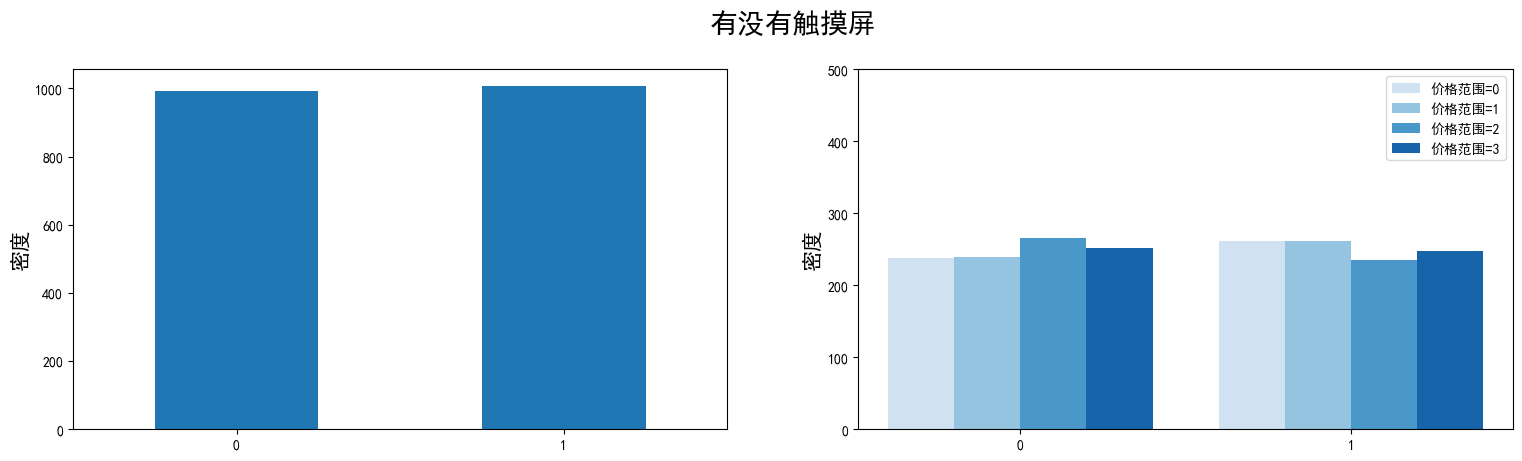

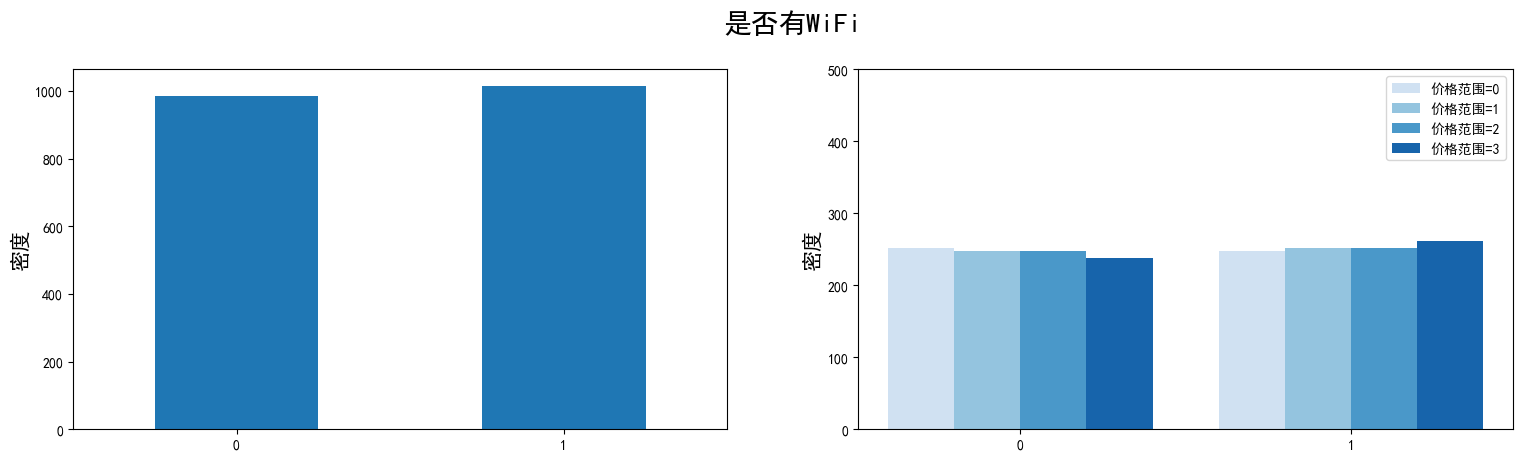

In [110]:
import seaborn as sns

def categorical_univariate_analysis(categorical_columns):
    # 定义蓝色调色板
    palette = sns.color_palette("Blues", n_colors=4)

    for i in categorical_columns:
        fig, ax = plt.subplots(1, 2, figsize=(18, 6))

        categories = pd.Categorical(df_train[i[0]], categories=[0, 1], ordered=True)
        value_counts = categories.value_counts()
        value_counts.plot(kind='bar', ax=ax[0])

        ax[0].set_xlabel('')
        ax[0].set_ylabel('密度', size=15)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

        level_values = categories.categories.tolist()

        bar_width = 0.2
        for j in range(4):
            subset_data = df_train[df_train['price_range'] == j]
            subset_counts = subset_data[i[0]].value_counts().sort_index()
            position = np.arange(len(level_values))
            # 设置柱状图的颜色
            ax[1].bar(position + j * bar_width, subset_counts, width=bar_width, label=f'价格范围={j}', color=palette[j])


        ax[1].set_ylabel('密度', size=15)
        ax[1].set_xticks(position + 1.5 * bar_width)
        ax[1].set_xticklabels(level_values)

        # 设置图例显示在右上角，并调整位置和大小
        ax[1].legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
        plt.suptitle(i[1], size=20, y=0.9)  # 调整标题位置
        plt.ylim(0,500)
        plt.subplots_adjust(top=0.8, bottom=0.2, left=0.1, right=0.9)  # 调整子图布局
        plt.show()

categorical_columns = np.array([
    ['blue', '是否有蓝牙'],
    ['dual_sim', '是否支持双卡'],
    ['four_g', '是否有4G'],
    ['three_g', '是否有3G'],
    ['touch_screen', '有没有触摸屏'],
    ['wifi', '是否有WiFi']
])
categorical_univariate_analysis(categorical_columns)

In [105]:
cross_tab = pd.crosstab(df_train['three_g'], df_train['four_g'])
cross_tab 

four_g,0,1
three_g,,
0,477,0
1,480,1043


In [119]:
df_train['px'] = df_train['px_height'] * df_train['px_width']
df_train['sc'] = df_train['sc_h'] * df_train['sc_w']
df_train.drop(['px_height','px_width','sc_h','sc_w'], axis=1, inplace=True)
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,px,sc
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,15120,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,1799140,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,2167308,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,2171776,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,1464096,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,0,2309580,52
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,2,1797975,110
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,3,1416576,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,0,225120,180


In [120]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'px', 'sc'],
      dtype='object')

In [4]:
#划分测试集和训练集
from sklearn.model_selection import train_test_split
X = df_train.drop('price_range',axis = 1)
y = df_train['price_range']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =11)
print(X_train.shape,X_test.shape)

(1600, 20) (400, 20)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
#忽略警告
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

逻辑回归

In [ ]:
import time  
start = time.time()  
param_grid = {  
    'solver':['newton-cg'],
    'C':np.arange(12,14,0.1),
    'max_iter':np.arange(115,500,50)
}  
	  
rfc = LogisticRegression(random_state=11)  
GS = GridSearchCV(rfc,param_grid,cv=5)  
GS.fit(X_train,y_train)  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  
print(GS.best_params_)  
print(GS.best_score_)   

训练集最优参数以及最高得分: [1.0000e+03 6.1375e-01]
测试集最优参数以及最高得分: [1.000e+04 5.725e-01]


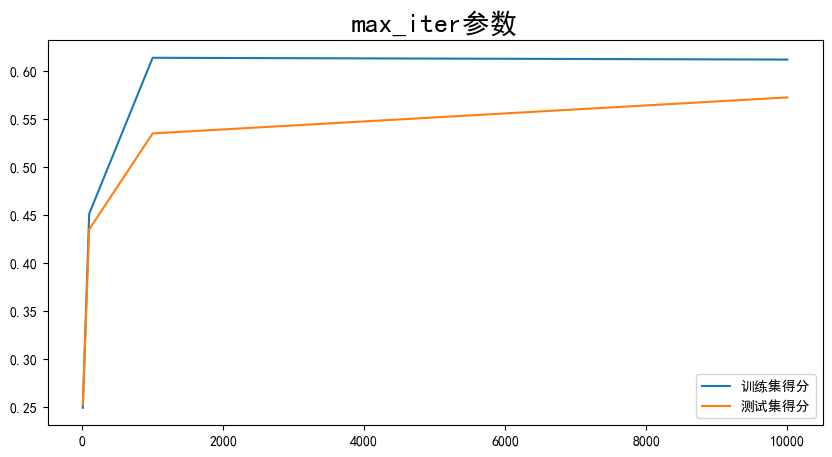

循环运行时间:4.96秒


In [204]:
#调max_iter参数
start = time.time()  
ScoreAll_train= []  
ScoreAll_test= [] 
for i in [10,100,1000,10000]:   
    DT = LogisticRegression(max_iter = i,random_state = 11)
    score_train = cross_val_score(DT,X_train,y_train,cv=5).mean()  
    score_test= cross_val_score(DT,X_test,y_test,cv=5).mean() 
    ScoreAll_train.append([i,score_train])  
    ScoreAll_test.append([i,score_test])
ScoreAll_train = np.array(ScoreAll_train)
ScoreAll_test= np.array(ScoreAll_test) 

max_score_train = np.where(ScoreAll_train==np.max(ScoreAll_train[:,1]))[0][0] 
max_score_test = np.where(ScoreAll_test==np.max(ScoreAll_test[:,1]))[0][0] 
print("训练集最优参数以及最高得分:",ScoreAll_train[max_score_train])   
print("测试集最优参数以及最高得分:",ScoreAll_test[max_score_test])   
plt.figure(figsize=[10,5])  
plt.plot(ScoreAll_train[:,0],ScoreAll_train[:,1],label='训练集得分')  
plt.plot(ScoreAll_test[:,0],ScoreAll_test[:,1], label='测试集得分') 
plt.legend()
plt.title('max_iter参数', size=20)
plt.show()  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  

训练集最优参数以及最高得分: [9.1      0.653125]
测试集最优参数以及最高得分: [4.1    0.5975]


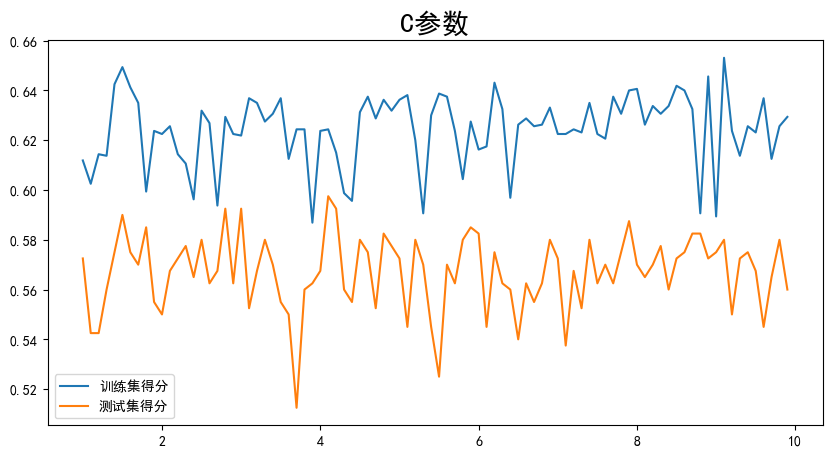

循环运行时间:333.04秒


In [203]:
#调C参数
start = time.time()  
ScoreAll_train= []  
ScoreAll_test= [] 
for i in np.arange(1,10,0.1):   
    DT = LogisticRegression(C = i,random_state = 11,max_iter=10000)
    score_train = cross_val_score(DT,X_train,y_train,cv=5).mean()  
    score_test= cross_val_score(DT,X_test,y_test,cv=5).mean() 
    ScoreAll_train.append([i,score_train])  
    ScoreAll_test.append([i,score_test])
ScoreAll_train = np.array(ScoreAll_train)
ScoreAll_test= np.array(ScoreAll_test) 

max_score_train = np.where(ScoreAll_train==np.max(ScoreAll_train[:,1]))[0][0] 
max_score_test = np.where(ScoreAll_test==np.max(ScoreAll_test[:,1]))[0][0] 
print("训练集最优参数以及最高得分:",ScoreAll_train[max_score_train])   
print("测试集最优参数以及最高得分:",ScoreAll_test[max_score_test])   
plt.figure(figsize=[10,5])  
plt.plot(ScoreAll_train[:,0],ScoreAll_train[:,1],label='训练集得分')  
plt.plot(ScoreAll_test[:,0],ScoreAll_test[:,1], label='测试集得分') 
plt.legend()
plt.title('C参数', size=20)
plt.show()  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  

In [33]:
#调参以后
from sklearn.metrics import classification_report

def Model(model):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(cv_scores)
    print("训练集交叉验证得分平均值: ", cv_scores.mean())
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    print('训练集得分 ', model_train_score)
    print('测试集得分 ', model_test_score)

    # 打印分类报告
    report = classification_report(y_test, prediction)
    print('Classification Report:\n', report)

    # 绘制混淆矩阵
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap="OrRd")
    plt.xlabel('预测值',size=15)
    plt.ylabel('真值',size=15)
    plt.show()



训练集交叉验证得分平均值:  0.6262500000000001
训练集得分  0.6275
测试集得分  0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       104
           1       0.47      0.48      0.48        98
           2       0.40      0.39      0.40        97
           3       0.62      0.72      0.67       101

    accuracy                           0.58       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.59      0.58      0.58       400



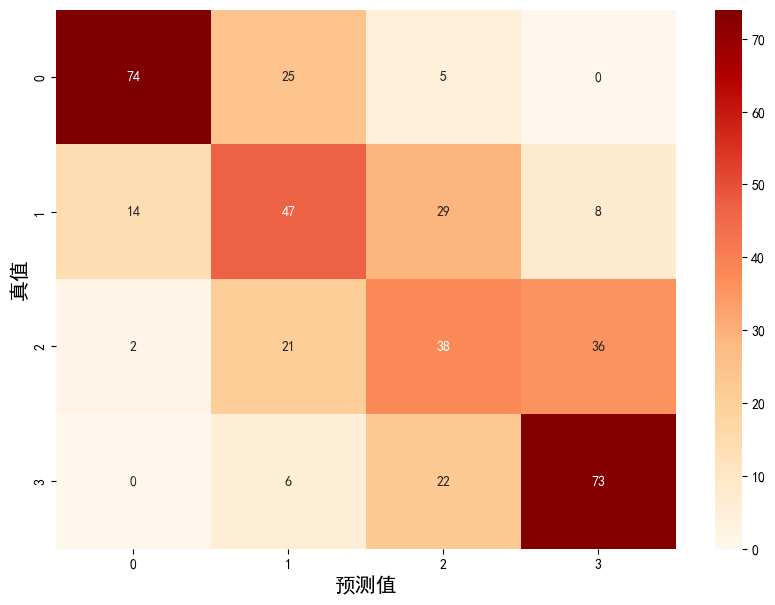

In [215]:
lg_reg = LogisticRegression(C= 4.1, max_iter= 10000)
Model(lg_reg)

决策树分类

训练集最优参数以及最高得分: [71.       0.86375]
测试集最优参数以及最高得分: [68.    0.82]


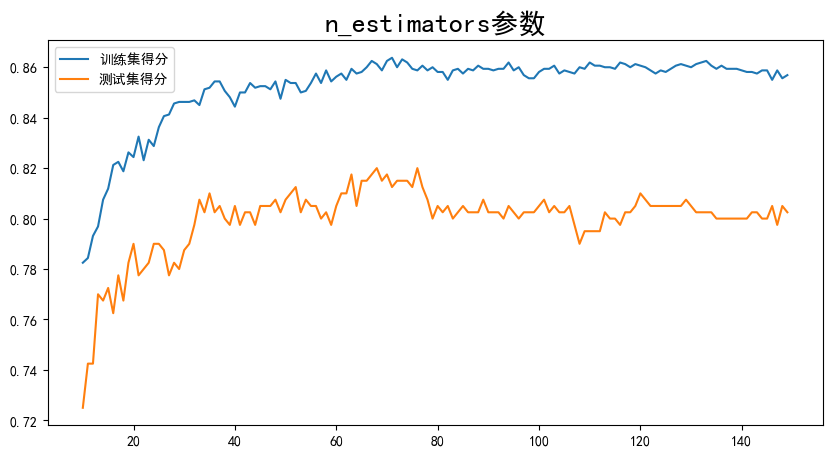

循环运行时间:203.58秒


In [221]:
#调n_estimators参数，决策树的数量
from sklearn.ensemble import RandomForestClassifier
start = time.time()  
ScoreAll_train= []  
ScoreAll_test= [] 
for i in range(10,150,1):   
    DT = RandomForestClassifier(n_estimators = i,random_state = 11)
    score_train = cross_val_score(DT,X_train,y_train,cv=5).mean()  
    score_test= cross_val_score(DT,X_test,y_test,cv=5).mean() 
    ScoreAll_train.append([i,score_train])  
    ScoreAll_test.append([i,score_test])
ScoreAll_train = np.array(ScoreAll_train)
ScoreAll_test= np.array(ScoreAll_test) 

max_score_train = np.where(ScoreAll_train==np.max(ScoreAll_train[:,1]))[0][0] 
max_score_test = np.where(ScoreAll_test==np.max(ScoreAll_test[:,1]))[0][0] 
print("训练集最优参数以及最高得分:",ScoreAll_train[max_score_train])   
print("测试集最优参数以及最高得分:",ScoreAll_test[max_score_test])   
plt.figure(figsize=[10,5])  
plt.plot(ScoreAll_train[:,0],ScoreAll_train[:,1],label='训练集得分')  
plt.plot(ScoreAll_test[:,0],ScoreAll_test[:,1], label='测试集得分') 
plt.legend()
plt.title('n_estimators参数', size=20)
plt.show()  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  

训练集最优参数以及最高得分: [0.73     0.895625]
测试集最优参数以及最高得分: [0.39  0.845]


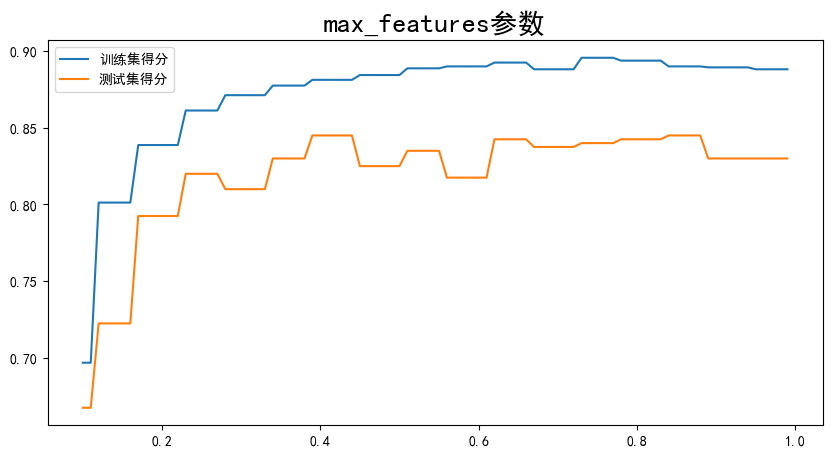

循环运行时间:225.89秒


In [225]:
#调max_features参数，特征子集的大小
from sklearn.ensemble import RandomForestClassifier
start = time.time()  
ScoreAll_train= []  
ScoreAll_test= [] 
for i in np.arange(0.1, 1,0.01):   #改这里
    DT = RandomForestClassifier(n_estimators = 68,random_state = 11,max_features=i)#改这里
    score_train = cross_val_score(DT,X_train,y_train,cv=5).mean()  
    score_test= cross_val_score(DT,X_test,y_test,cv=5).mean() 
    ScoreAll_train.append([i,score_train])  
    ScoreAll_test.append([i,score_test])
ScoreAll_train = np.array(ScoreAll_train)
ScoreAll_test= np.array(ScoreAll_test) 

max_score_train = np.where(ScoreAll_train==np.max(ScoreAll_train[:,1]))[0][0] 
max_score_test = np.where(ScoreAll_test==np.max(ScoreAll_test[:,1]))[0][0] 
print("训练集最优参数以及最高得分:",ScoreAll_train[max_score_train])   
print("测试集最优参数以及最高得分:",ScoreAll_test[max_score_test])   
plt.figure(figsize=[10,5])  
plt.plot(ScoreAll_train[:,0],ScoreAll_train[:,1],label='训练集得分')  
plt.plot(ScoreAll_test[:,0],ScoreAll_test[:,1], label='测试集得分') 
plt.legend()
plt.title('max_features参数', size=20)#改这里
plt.show()  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  

训练集最优参数以及最高得分: [16.     0.885]
测试集最优参数以及最高得分: [15.     0.845]


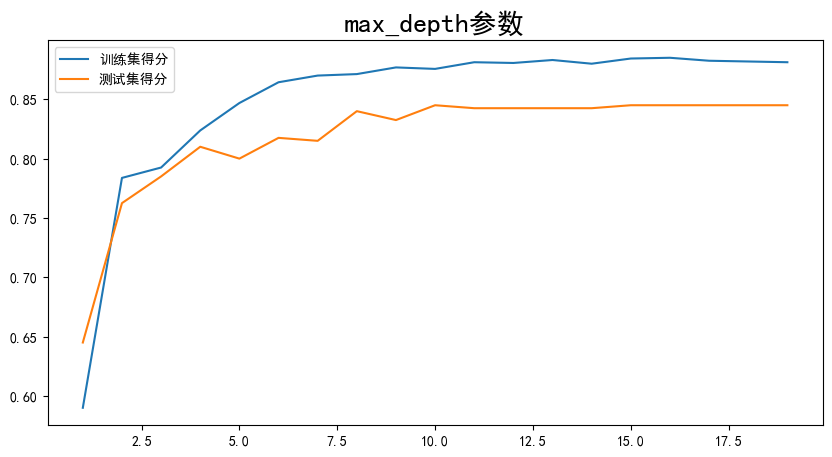

循环运行时间:38.94秒


In [228]:
#调max_depth参数，决策树的最大深度
from sklearn.ensemble import RandomForestClassifier
start = time.time()  
ScoreAll_train= []  
ScoreAll_test= [] 
for i in np.arange(1,20,1):                                                                           #改这里
    DT = RandomForestClassifier(n_estimators = 68,random_state = 11,max_features=0.39,max_depth=i)     #改这里
    score_train = cross_val_score(DT,X_train,y_train,cv=5).mean()  
    score_test= cross_val_score(DT,X_test,y_test,cv=5).mean() 
    ScoreAll_train.append([i,score_train])  
    ScoreAll_test.append([i,score_test])
ScoreAll_train = np.array(ScoreAll_train)
ScoreAll_test= np.array(ScoreAll_test) 

max_score_train = np.where(ScoreAll_train==np.max(ScoreAll_train[:,1]))[0][0] 
max_score_test = np.where(ScoreAll_test==np.max(ScoreAll_test[:,1]))[0][0] 
print("训练集最优参数以及最高得分:",ScoreAll_train[max_score_train])   
print("测试集最优参数以及最高得分:",ScoreAll_test[max_score_test])   
plt.figure(figsize=[10,5])  
plt.plot(ScoreAll_train[:,0],ScoreAll_train[:,1],label='训练集得分')  
plt.plot(ScoreAll_test[:,0],ScoreAll_test[:,1], label='测试集得分') 
plt.legend()
plt.title('max_depth参数', size=20)                                                                    #改这里
plt.show()  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  

训练集最优参数以及最高得分: [9.       0.885625]
测试集最优参数以及最高得分: [1.    0.845]


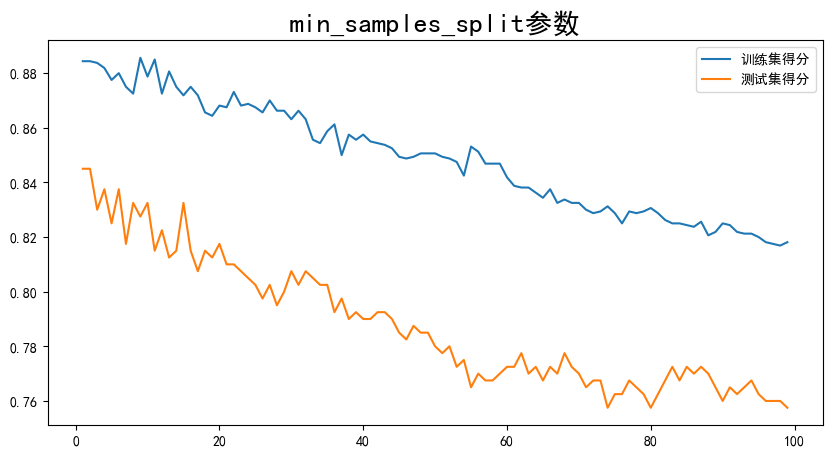

循环运行时间:186.16秒


In [230]:
#调min_samples_split参数，内部节点划分所需的最小样本数
from sklearn.ensemble import RandomForestClassifier
start = time.time()  
ScoreAll_train= []  
ScoreAll_test= [] 
for i in np.arange(1,100,1):                                                                           #改这里
    DT = RandomForestClassifier(n_estimators = 68,random_state = 11,max_features=0.39,max_depth=15,min_samples_split=i)     #改这里
    score_train = cross_val_score(DT,X_train,y_train,cv=5).mean()  
    score_test= cross_val_score(DT,X_test,y_test,cv=5).mean() 
    ScoreAll_train.append([i,score_train])  
    ScoreAll_test.append([i,score_test])
ScoreAll_train = np.array(ScoreAll_train)
ScoreAll_test= np.array(ScoreAll_test) 

max_score_train = np.where(ScoreAll_train==np.max(ScoreAll_train[:,1]))[0][0] 
max_score_test = np.where(ScoreAll_test==np.max(ScoreAll_test[:,1]))[0][0] 
print("训练集最优参数以及最高得分:",ScoreAll_train[max_score_train])   
print("测试集最优参数以及最高得分:",ScoreAll_test[max_score_test])   
plt.figure(figsize=[10,5])  
plt.plot(ScoreAll_train[:,0],ScoreAll_train[:,1],label='训练集得分')  
plt.plot(ScoreAll_test[:,0],ScoreAll_test[:,1], label='测试集得分') 
plt.legend()
plt.title('min_samples_split参数', size=20)                                                                    #改这里
plt.show()  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  

训练集最优参数以及最高得分: [1.       0.884375]
测试集最优参数以及最高得分: [1.    0.845]


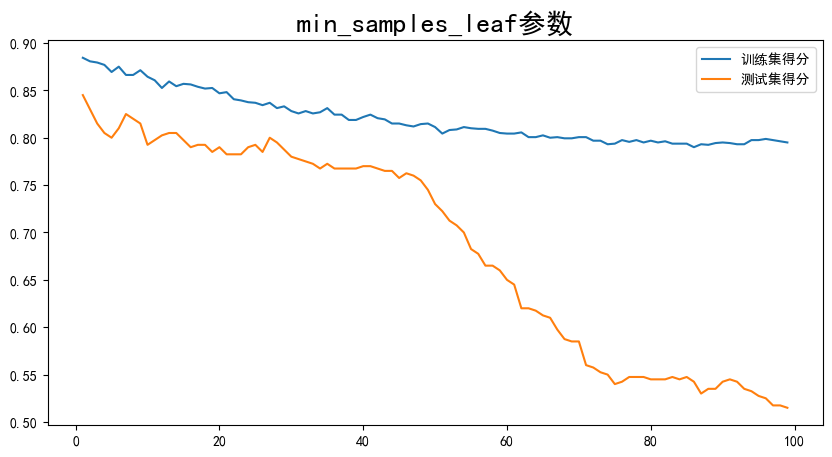

循环运行时间:154.33秒


In [231]:
#调min_samples_leaf参数，叶节点所需的最小样本数
from sklearn.ensemble import RandomForestClassifier
start = time.time()  
ScoreAll_train= []  
ScoreAll_test= [] 
for i in np.arange(1,100,1):                                                                           #改这里
    DT = RandomForestClassifier(n_estimators = 68,random_state = 11,max_features=0.39,max_depth=15,min_samples_split=1,min_samples_leaf=i)     #改这里
    score_train = cross_val_score(DT,X_train,y_train,cv=5).mean()  
    score_test= cross_val_score(DT,X_test,y_test,cv=5).mean() 
    ScoreAll_train.append([i,score_train])  
    ScoreAll_test.append([i,score_test])
ScoreAll_train = np.array(ScoreAll_train)
ScoreAll_test= np.array(ScoreAll_test) 

max_score_train = np.where(ScoreAll_train==np.max(ScoreAll_train[:,1]))[0][0] 
max_score_test = np.where(ScoreAll_test==np.max(ScoreAll_test[:,1]))[0][0] 
print("训练集最优参数以及最高得分:",ScoreAll_train[max_score_train])   
print("测试集最优参数以及最高得分:",ScoreAll_test[max_score_test])   
plt.figure(figsize=[10,5])  
plt.plot(ScoreAll_train[:,0],ScoreAll_train[:,1],label='训练集得分')  
plt.plot(ScoreAll_test[:,0],ScoreAll_test[:,1], label='测试集得分') 
plt.legend()
plt.title('min_samples_leaf参数', size=20)                                                                    #改这里
plt.show()  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  

In [234]:
#在得到的最优参数附近进行小范围网格搜索
import time  
start = time.time()  
param_grid = {  
  'n_estimators':np.arange(65,70),  
  'max_depth':np.arange(13, 18),  
   'max_features':np.arange(0.35, 0.43,0.01)  
}  
	  
rfc = RandomForestClassifier(random_state=11)  
GS = GridSearchCV(rfc,param_grid,cv=5)  
GS.fit(X,y)  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  
print(GS.best_params_)  
print(GS.best_score_)   

循环运行时间:387.17秒
{'max_depth': 15, 'max_features': 0.39, 'n_estimators': 67}
0.8924999999999998


[0.853125 0.875    0.90625  0.9      0.9     ]
训练集交叉验证得分平均值:  0.8868750000000001
训练集得分  1.0
测试集得分  0.905
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       104
           1       0.86      0.91      0.88        98
           2       0.85      0.87      0.86        97
           3       0.96      0.90      0.93       101

    accuracy                           0.91       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



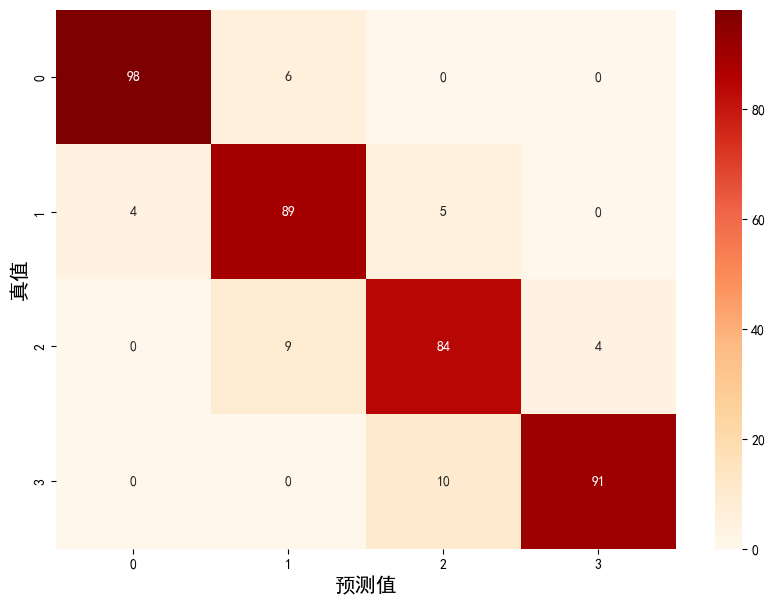

ram: 0.6229
battery_power: 0.0890
px: 0.0874
mobile_wt: 0.0313
int_memory: 0.0256
sc: 0.0239
talk_time: 0.0194
clock_speed: 0.0173
m_dep: 0.0171
pc: 0.0158
fc: 0.0153
n_cores: 0.0141
blue: 0.0042
touch_screen: 0.0037
four_g: 0.0037
dual_sim: 0.0032
three_g: 0.0031
wifi: 0.0029


In [241]:
rf_reg = RandomForestClassifier(n_estimators = 67,random_state = 11,max_features=0.39,max_depth=15,min_samples_split=1,min_samples_leaf=1)
Model(rf_reg)
# 获取特征重要性
feature_importance = rf_reg.feature_importances_
feature_importance_sorted = sorted(zip(feature_importance, X_train.columns), reverse=True)
for importance, variable in feature_importance_sorted:
    print(f"{variable}: {importance:.4f}")

支持向量机


In [23]:
from sklearn.svm import SVC
from time import time
import datetime

kernels = ['linear', 'poly', 'rbf']
for kernel_type in kernels:
    time0 = time()
    clf = SVC(kernel=kernel_type, degree=3, gamma="auto")
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
    elapsed_time = datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f")

    print("准确率  %s is %f" % (kernel_type, accuracy))
    print("训练时间: %s" % elapsed_time)


准确率  linear is 0.972500
训练时间: 00:06:706206
准确率  poly is 0.965000
训练时间: 00:00:333652
准确率  rbf is 0.242500
训练时间: 00:00:390084


The best score is  0.9725  , and it's degree is  1


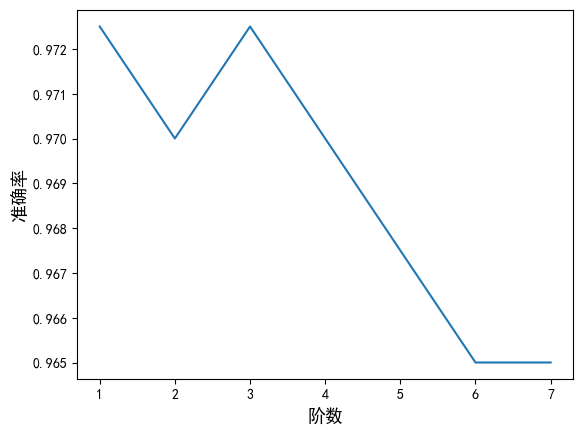

In [26]:
#调节degree参数
score = []
degree_range = np.arange(1,8,1)
for i in degree_range:
    clf = SVC(kernel = 'poly',degree=i).fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))
print('The best score is ',max(score)," , and it's degree is ",degree_range[score.index(max(score))])
plt.xlabel('阶数',size=13)
plt.ylabel('准确率',size=13)
plt.plot(degree_range,score) # 画出学习曲线
plt.show()


训练集最优参数以及最高得分: [0.01     0.976875]
测试集最优参数以及最高得分: [0.01  0.965]


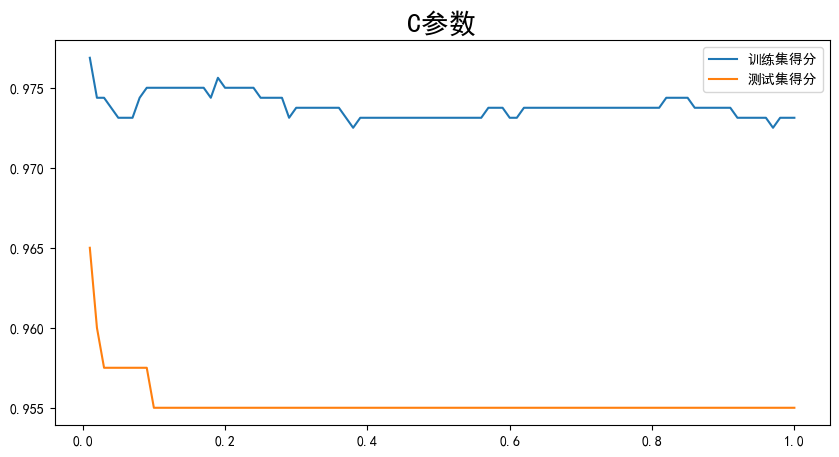

循环运行时间:1182.58秒


In [32]:
#调节C参数
import time  
start = time.time()  
ScoreAll_train= []  
ScoreAll_test= [] 
for i in np.arange(0.01,1.01,0.01):                                                                           #改这里
    DT = SVC(kernel = 'linear',random_state = 11,C=i)                                 #改这里
    score_train = cross_val_score(DT,X_train,y_train,cv=5).mean()  
    score_test= cross_val_score(DT,X_test,y_test,cv=5).mean() 
    ScoreAll_train.append([i,score_train])  
    ScoreAll_test.append([i,score_test])
ScoreAll_train = np.array(ScoreAll_train)
ScoreAll_test= np.array(ScoreAll_test) 

max_score_train = np.where(ScoreAll_train==np.max(ScoreAll_train[:,1]))[0][0] 
max_score_test = np.where(ScoreAll_test==np.max(ScoreAll_test[:,1]))[0][0] 
print("训练集最优参数以及最高得分:",ScoreAll_train[max_score_train])   
print("测试集最优参数以及最高得分:",ScoreAll_test[max_score_test])   
plt.figure(figsize=[10,5])  
plt.plot(ScoreAll_train[:,0],ScoreAll_train[:,1],label='训练集得分')  
plt.plot(ScoreAll_test[:,0],ScoreAll_test[:,1], label='测试集得分') 
plt.legend()
plt.title('C参数', size=20)                                                                    #改这里
plt.show()  
end = time.time()  
print("循环运行时间:%.2f秒"%(end-start))  

[0.975    0.965625 0.978125 0.975    0.98125 ]
训练集交叉验证得分平均值:  0.975
训练集得分  0.990625
测试集得分  0.9825
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       0.98      0.97      0.97        98
           2       0.97      0.96      0.96        97
           3       0.98      1.00      0.99       101

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



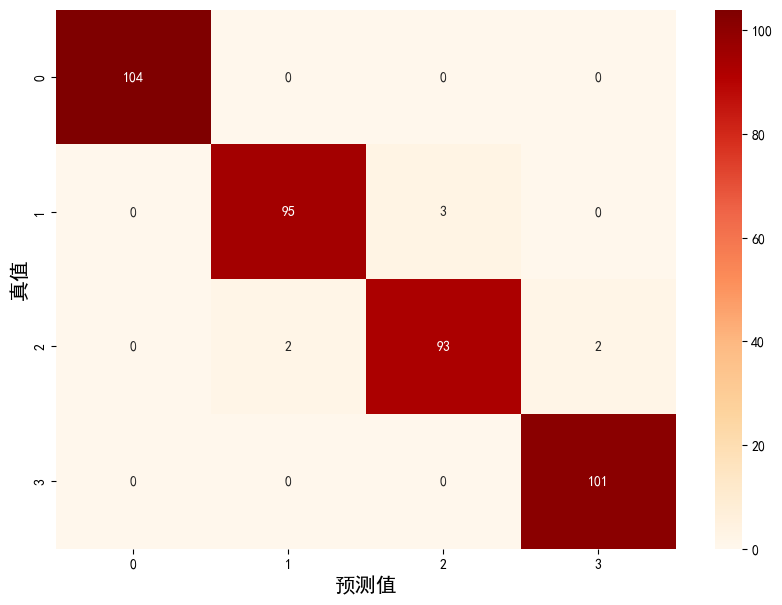

clock_speed: 0.2129246505769048
touch_screen: 0.1710922367165626
wifi: 0.1636305559506419
mobile_wt: 0.13753993571030776
four_g: 0.13622056112872702
dual_sim: 0.12430640665185898
price_range: 0.11267038908132854
pc: 0.07786756878247658
m_dep: 0.03153076530568161
blue: 0.00734620847265105
fc: -0.01270169208638161
int_memory: -0.025900724281488152
px: -0.03482742357052604
talk_time: -0.039356827429742225
ram: -0.03969894531820728
battery_power: -0.06789435562143353
sc: -0.09969409875997176
three_g: -0.11162164279869558
n_cores: -0.5493971949789014
Intercept: 268.7954607951461


In [40]:
svc_reg =SVC(kernel = 'linear',random_state = 11,C=0.1)
Model(svc_reg)
# 获取特征重要性
# 定义特征名称列表
feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'px', 'sc']

# 获取各个自变量的贡献值的索引（按照贡献值从大到小的顺序）
sorted_indices = np.argsort(-coefficients[0])

# 输出各个自变量的贡献值（按照贡献值从大到小的顺序）
for i in sorted_indices:
    if i < len(feature_names):
        feature_name = feature_names[i]
        contribution = coefficients[0, i]
        print(f'{feature_name}: {contribution}')

# 输出截距项
print(f'Intercept: {intercept[0]}')
